In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

In [161]:
df = pd.read_csv('/Users/kartik/Desktop/oslogs.csv')

In [162]:
dfpp=df

In [163]:
df2=df

In [164]:
df2

,date,timestamp,process_id,type,component,message
0,2018-06-26,03:22:03.740,2484,DEBUG,nova.osapi_compute.wsgi.server,"(2484) accepted ('10.0.20.24', 60250) server /..."
1,2018-06-26,03:22:05.064,2484,DEBUG,nova.api.openstack.wsgi,"Azione: 'create', metodo chiamata: <function v..."
2,2018-06-26,03:22:05.210,2484,DEBUG,nova.quota,Getting quotas for project 7fe534e304ac44ee938...
3,2018-06-26,03:22:05.243,2484,DEBUG,nova.quota,Getting quotas for user c7837757952f4844bee22a...
4,2018-06-26,03:22:05.396,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/7fe534e304ac44ee9384630..."
...,...,...,...,...,...,...
1673232,2018-09-29,13:37:52.353,1096,INFO,cinder.volume.api,Volume info retrieved successfully.
1673233,2018-09-29,13:37:52.502,1096,INFO,cinder.volume.api,Delete volume request issued successfully.
1673234,2018-09-29,13:37:52.505,1096,INFO,cinder.api.openstack.wsgi,http://10.0.20.25:8776/v3/bd8a53962fd64ffeab7f...
1673235,2018-09-29,13:37:52.508,1096,INFO,eventlet.wsgi.server,"10.0.20.25 ""DELETE /v3/bd8a53962fd64ffeab7f293..."


In [165]:
df.head()

,date,timestamp,process_id,type,component,message
0,2018-06-26,03:22:03.740,2484,DEBUG,nova.osapi_compute.wsgi.server,"(2484) accepted ('10.0.20.24', 60250) server /..."
1,2018-06-26,03:22:05.064,2484,DEBUG,nova.api.openstack.wsgi,"Azione: 'create', metodo chiamata: <function v..."
2,2018-06-26,03:22:05.210,2484,DEBUG,nova.quota,Getting quotas for project 7fe534e304ac44ee938...
3,2018-06-26,03:22:05.243,2484,DEBUG,nova.quota,Getting quotas for user c7837757952f4844bee22a...
4,2018-06-26,03:22:05.396,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/7fe534e304ac44ee9384630..."


In [166]:
df.isnull().sum()

date          0
timestamp     0
process_id    0
type          0
component     0
message       0
dtype: int64

In [167]:
df.describe()

,process_id
count,1.673237e+06
mean,1.652588e+04
std,9.289293e+03
min,3.260000e+02
25%,8.265000e+03
50%,1.651100e+04
75%,2.460700e+04
max,3.269100e+04


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673237 entries, 0 to 1673236
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1673237 non-null  object
 1   timestamp   1673237 non-null  object
 2   process_id  1673237 non-null  int64 
 3   type        1673237 non-null  object
 4   component   1673237 non-null  object
 5   message     1673237 non-null  object
dtypes: int64(1), object(5)
memory usage: 76.6+ MB


In [169]:
df['date'] = pd.to_datetime(df['date'])

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert 'process_id' to int64
df['process_id'] = df['process_id'].astype('int64')

# Convert 'type', 'component', and 'message' to string
df['type'] = df['type'].astype('str')
df['component'] = df['component'].astype('str')
df['message'] = df['message'].astype('str')


In [170]:
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
df['process_id'] = df['process_id'].astype(int)

In [171]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'date' and 'timestamp' to datetime if not already
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column 'datetime' by combining 'date' and 'timestamp'
df['datetime'] = df['date'] + pd.to_timedelta(df['timestamp'].dt.time.astype(str))

# Group by date and count the number of logs
logs_per_date = df.groupby(df['datetime'].dt.date).size()

# Print the result
print(logs_per_date)



datetime
2018-06-26    108621
2018-06-27    170359
2018-06-28    199202
2018-06-29     42840
2018-06-30    183151
2018-07-02     50222
2018-07-03     52827
2018-09-12     45461
2018-09-13    151982
2018-09-14    139036
2018-09-17      4946
2018-09-28    170034
2018-09-29    303766
2018-09-30     50790
dtype: int64


In [145]:
logs_per_date.to_csv('/Users/kartik/Desktop/osfolder/date_logs.csv')

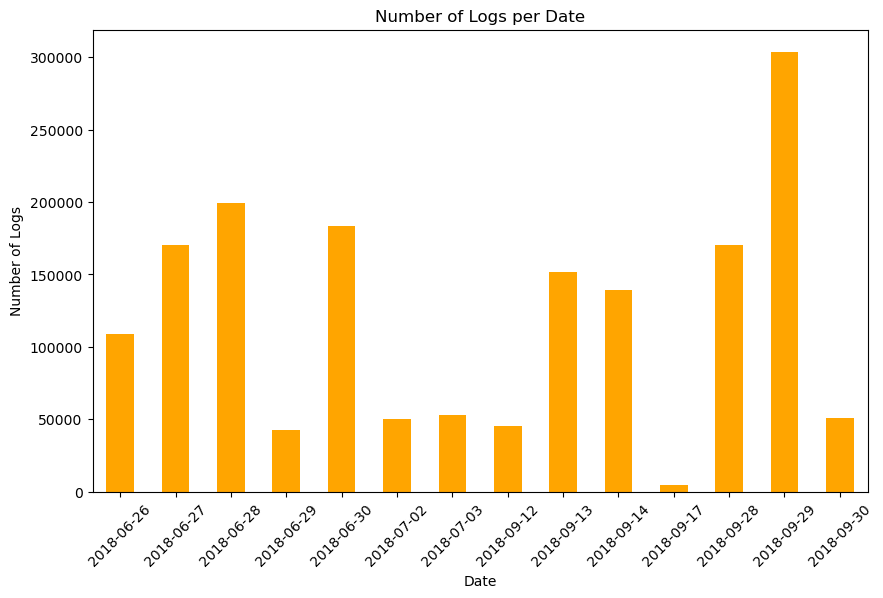

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert 'date' and 'timestamp' to datetime if not already
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column 'datetime' by combining 'date' and 'timestamp'
df['datetime'] = df['date'] + pd.to_timedelta(df['timestamp'].dt.time.astype(str))

# Group by date and count the number of logs
logs_per_date = df.groupby(df['datetime'].dt.date).size()

# Plotting
plt.figure(figsize=(10, 6))
logs_per_date.plot(kind='bar', color='orange')
plt.title('Number of Logs per Date')
plt.xlabel('Date')
plt.ylabel('Number of Logs')
plt.xticks(rotation=45)
plt.show()


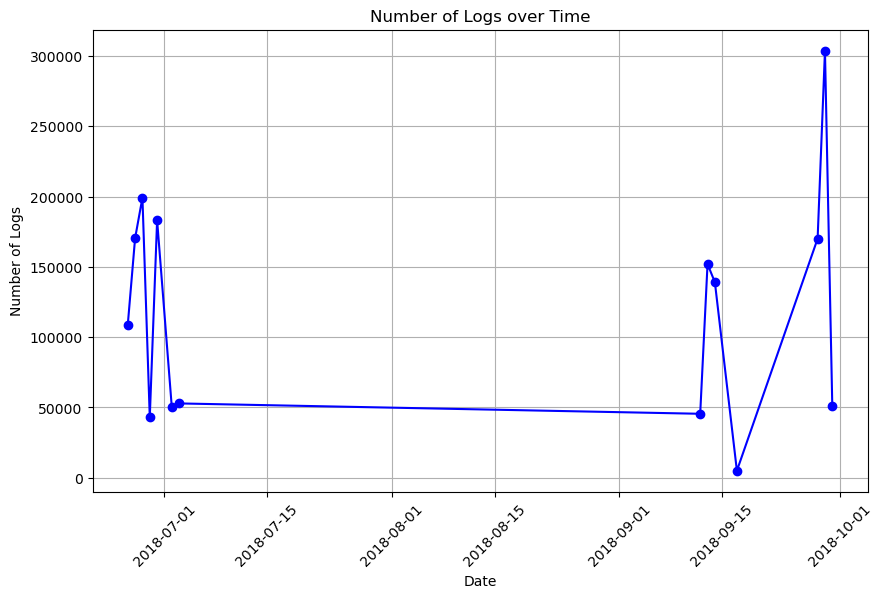

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert 'date' and 'timestamp' to datetime if not already
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column 'datetime' by combining 'date' and 'timestamp'
df['datetime'] = df['date'] + pd.to_timedelta(df['timestamp'].dt.time.astype(str))

# Group by date and count the number of logs
logs_per_date = df.groupby(df['datetime'].dt.date).size()

# Plotting as a line graph
plt.figure(figsize=(10, 6))
logs_per_date.plot(kind='line', marker='o', color='blue')
plt.title('Number of Logs over Time')
plt.xlabel('Date')
plt.ylabel('Number of Logs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


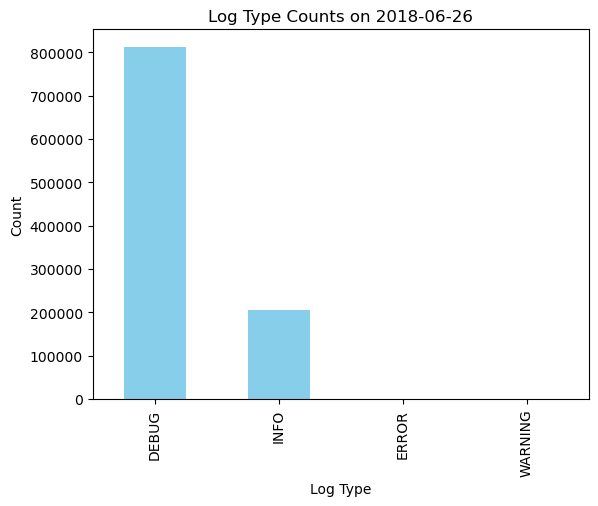

In [211]:
specific_date = '2018-06-26'
filtered_df = df[df['date'] == specific_date]

# Count log types for the specific date
log_type_counts = df['type'].value_counts()

# Plot a bar chart for log type counts
log_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Log Type')
plt.ylabel('Count')
plt.title(f'Log Type Counts on {specific_date}')
plt.show()


In [175]:
log_type_counts.to_csv('/Users/kartik/Desktop/osfolder/log_types.csv')

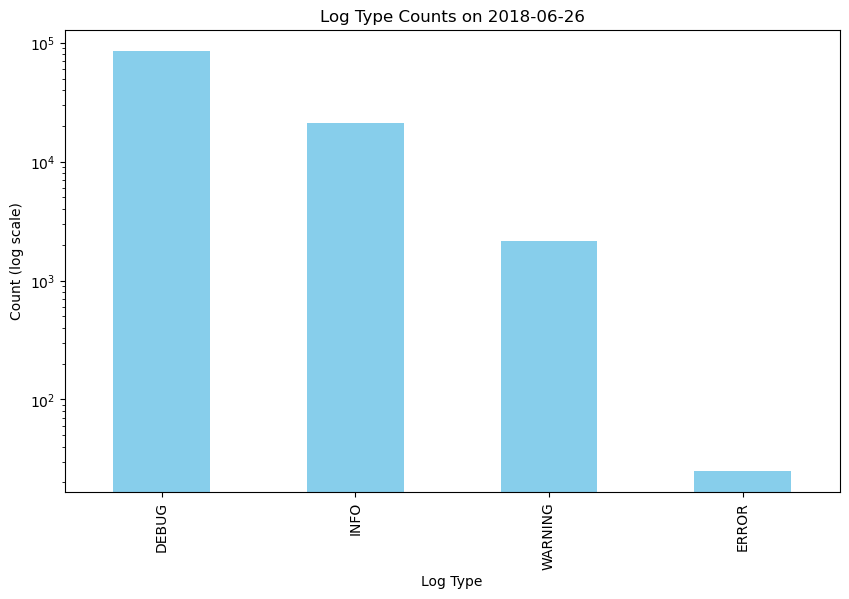

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Set a specific date
specific_date = '2018-06-26'
filtered_df = df[df['date'] == specific_date]

# Count log types for the specific date
log_type_counts = filtered_df['type'].value_counts()

# Plot a bar chart for log type counts with a logarithmic scale
plt.figure(figsize=(10, 6))
log_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Log Type')
plt.ylabel('Count (log scale)')
plt.title(f'Log Type Counts on {specific_date}')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()


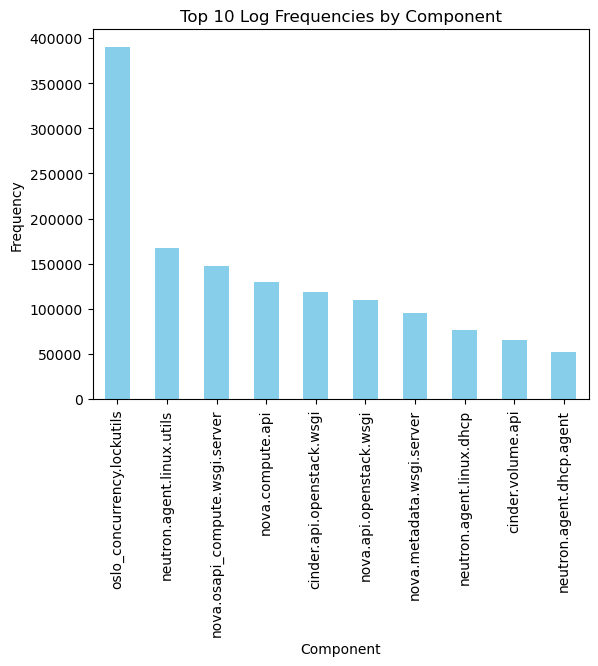

In [177]:
component_counts = df['component'].value_counts()

# Select the top 7 frequencies
top_components = component_counts.head(10)

# Plot a bar chart for the top 7 component frequencies
top_components.plot(kind='bar', color='skyblue')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Top 10 Log Frequencies by Component')
plt.show()



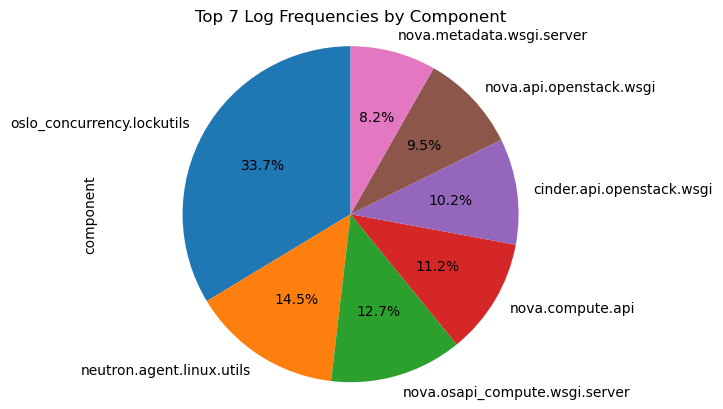

In [178]:
component_counts = df['component'].value_counts()

# Select the top 7 frequencies
top_components = component_counts.head(7)

# Plot a pie chart for the top 7 component frequencies
top_components.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 7 Log Frequencies by Component')
plt.show()




# Component-Based Classification

- **Classes**: Compute, Networking, Identity, Storage
- **Example**: Logs are grouped based on the component or service generating them. For instance, all logs related to Nova Compute are classified under the "Compute" class.

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Map components to the desired labels
label_mapping = {
    'oslo_concurrency.lockutils': None,  # Placeholder for now
    'nova.osapi_compute.wsgi.server': 'Compute',
    'nova.compute.api': 'Compute',
    # Add more mappings as needed
    'cinder.api.openstack.wsgi': 'Storage',
    'cinder.volume.api': 'Storage',
    # Add more mappings as needed
    'neutron.agent.linux.utils': 'Networking',
    'oslo_concurrency.lockutils': None,  # Placeholder for now
    # Add more mappings as needed
}

# Define a function to refine classification based on 'message'
def refine_classification(row):
    if row['component'] == 'oslo_concurrency.lockutils':
        if 'neutron' in row['message'] or 'qdhcp' in row['message'] or 'dhcp' in row['message']:
            return 'Networking'
        else:
            return 'Compute'
    else:
        return label_mapping.get(row['component'], None)

# Apply the refinement function to create the 'label' column
df['label'] = df.apply(refine_classification, axis=1)

# Drop rows where the mapping is not available
df = df.dropna(subset=['label'])

if not df.empty:
    # Encode labels
    label_encoder = LabelEncoder()
    df['label_encoded'] = label_encoder.fit_transform(df['label'])

    # Split the dataset into training and testing sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    # Check if there are samples in the training set before training the model
    if not train_df.empty:
        # Reshape both training and testing labels
        train_labels = train_df['label_encoded'].values
        test_labels = test_df['label_encoded'].values

        # Build and compile the model
        model = Sequential()
        model.add(Dense(64, input_dim=1, activation='relu'))
        model.add(Dense(len(label_encoder.classes_), activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        model.fit(train_df[['label_encoded']], train_labels, epochs=5, batch_size=32, validation_split=0.2)

        # Evaluate the model
        predictions = model.predict(test_df[['label_encoded']])
        predicted_labels = predictions.argmax(axis=1)

        # Calculate accuracy and display classification report
        accuracy = accuracy_score(test_labels, predicted_labels)
        print(f'Accuracy: {accuracy:.2f}')

        print('\nClassification Report:')
        print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))
    else:
        print("No samples in the training set.")
else:
    print("No samples in the dataset.")


/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/851760008.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = label_encoder.fit_transform(df['label'])


Epoch 1/5
20385/20385 [==============================] - 13s 631us/step - loss: 0.0210 - accuracy: 0.9983 - val_loss: 5.4273e-08 - val_accuracy: 1.0000
Epoch 2/5
20385/20385 [==============================] - 13s 613us/step - loss: 4.9450e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
20385/20385 [==============================] - 13s 631us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
20385/20385 [==============================] - 12s 606us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
6371/6371 [==============================] - 2s 340us/step
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

     Compute       1.00      1.00      1.00    111019
  Networking       1.00      1.00      1.00     56077
     Storage       1.00      1.00      1.00     36750

    accuracy                           1.00    203846


In [185]:
predicted_labels

array([2, 1, 0, ..., 0, 1, 2])

In [186]:
df.tail(50)

,date,timestamp,process_id,type,component,message,datetime,label,label_encoded
1673172,2018-09-29,2024-01-17 13:35:12.271,1092,DEBUG,cinder.api.openstack.wsgi,"Action: 'action', calling method: <bound metho...",2018-09-29 13:35:12.271,Storage,2
1673173,2018-09-29,2024-01-17 13:35:12.376,1092,INFO,cinder.volume.api,Volume info retrieved successfully.,2018-09-29 13:35:12.376,Storage,2
1673174,2018-09-29,2024-01-17 13:35:12.420,1092,INFO,cinder.volume.api,Update volume admin metadata completed success...,2018-09-29 13:35:12.420,Storage,2
1673175,2018-09-29,2024-01-17 13:35:12.961,1092,INFO,cinder.volume.api,Attach volume completed successfully.,2018-09-29 13:35:12.961,Storage,2
1673176,2018-09-29,2024-01-17 13:35:12.963,1092,INFO,cinder.api.openstack.wsgi,http://10.0.20.25:8776/v2/4b0e6b4886624a6c92e9...,2018-09-29 13:35:12.963,Storage,2
1673179,2018-09-29,2024-01-17 13:35:15.993,1087,INFO,cinder.api.openstack.wsgi,GET http://10.0.20.25:8776/v2/4b0e6b4886624a6c...,2018-09-29 13:35:15.993,Storage,2
1673180,2018-09-29,2024-01-17 13:35:15.994,1087,DEBUG,cinder.api.openstack.wsgi,Empty body provided in request get_body /usr/l...,2018-09-29 13:35:15.994,Storage,2
1673181,2018-09-29,2024-01-17 13:35:15.995,1087,DEBUG,cinder.api.openstack.wsgi,Calling method '<bound method VolumeController...,2018-09-29 13:35:15.995,Storage,2
1673182,2018-09-29,2024-01-17 13:35:16.093,1087,INFO,cinder.volume.api,Get all volumes completed successfully.,2018-09-29 13:35:16.093,Storage,2
1673183,2018-09-29,2024-01-17 13:35:16.156,1087,INFO,cinder.api.openstack.wsgi,http://10.0.20.25:8776/v2/4b0e6b4886624a6c92e9...,2018-09-29 13:35:16.156,Storage,2


In [187]:
osdata = df

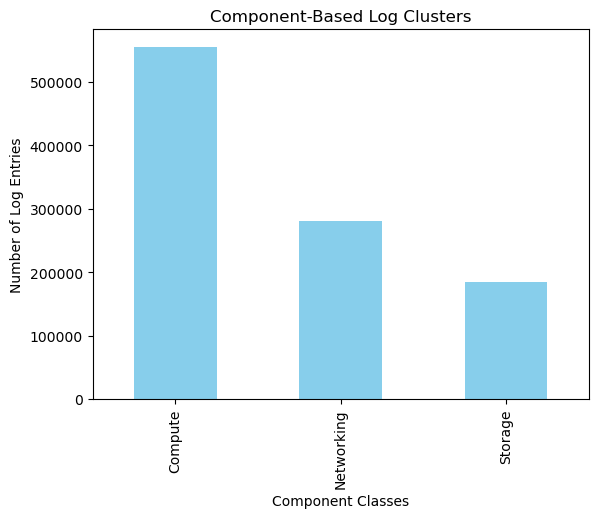

In [188]:
import matplotlib.pyplot as plt

# Group the data by the newly assigned component classes
grouped_data = df.groupby('label').size()

# Create a bar chart to visualize the distribution of log entries within each cluster
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Component Classes')
plt.ylabel('Number of Log Entries')
plt.title('Component-Based Log Clusters')
plt.show()


In [189]:
errors = df[df['type']=='ERROR']

In [190]:
errors

,date,timestamp,process_id,type,component,message,datetime,label,label_encoded
1194021,2018-09-12,2024-01-17 10:19:17.681,5250,ERROR,neutron.agent.linux.utils,Exit code: 2; Stdin: ; Stdout: ; Stderr: RTNET...,2018-09-12 10:19:17.681,Networking,1
1194047,2018-09-12,2024-01-17 10:19:24.100,5250,ERROR,neutron.agent.linux.utils,Exit code: 2; Stdin: ; Stdout: ; Stderr: RTNET...,2018-09-12 10:19:24.100,Networking,1
1194088,2018-09-12,2024-01-17 10:19:30.319,5250,ERROR,neutron.agent.linux.utils,Exit code: 2; Stdin: ; Stdout: ; Stderr: RTNET...,2018-09-12 10:19:30.319,Networking,1
1194127,2018-09-12,2024-01-17 10:20:06.626,5250,ERROR,neutron.agent.linux.utils,Exit code: 2; Stdin: ; Stdout: ; Stderr: RTNET...,2018-09-12 10:20:06.626,Networking,1
1194176,2018-09-12,2024-01-17 10:20:42.279,5250,ERROR,neutron.agent.linux.utils,Exit code: 2; Stdin: ; Stdout: ; Stderr: RTNET...,2018-09-12 10:20:42.279,Networking,1
...,...,...,...,...,...,...,...,...,...
1669731,2018-09-29,2024-01-17 01:48:09.605,16152,ERROR,cinder.volume.api,"Volume status must be available to reserve, bu...",2018-09-29 01:48:09.605,Storage,2
1670835,2018-09-29,2024-01-17 08:18:37.570,5037,ERROR,cinder.api.openstack.wsgi,Exception handling resource: Key None must be ...,2018-09-29 08:18:37.570,Storage,2
1670851,2018-09-29,2024-01-17 08:18:56.899,5035,ERROR,cinder.api.openstack.wsgi,Exception handling resource: Key None must be ...,2018-09-29 08:18:56.899,Storage,2
1671207,2018-09-29,2024-01-17 08:58:55.941,24312,ERROR,cinder.api.openstack.wsgi,Exception handling resource: 'NoneType' object...,2018-09-29 08:58:55.941,Storage,2


In [191]:
errors.to_csv('/Users/kartik/Desktop/errlogs.csv')

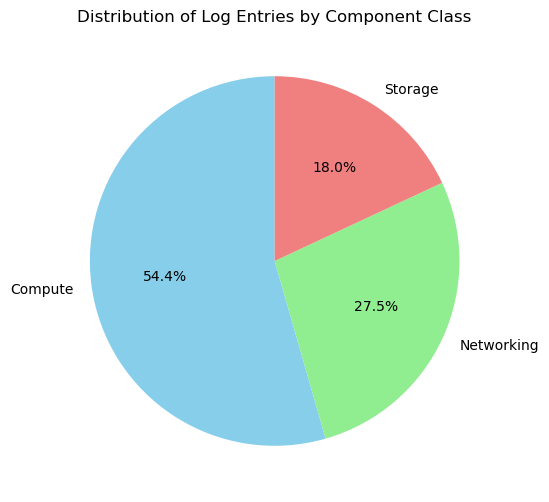

In [192]:
import matplotlib.pyplot as plt

# Count the occurrences of each component class
component_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(component_counts, labels=component_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Log Entries by Component Class')
plt.show()


# Clustering of content column

In [194]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame with log data
# Filter for error logs
error_logs = df[df['type'] == 'ERROR']

# Extract log messages
log_messages = error_logs['message'].astype(str)

# Use TF-IDF to vectorize log messages
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(log_messages)

# Determine the optimal number of clusters using silhouette score
max_clusters = 10  # You can adjust this based on your dataset
best_cluster_count = 2  # Default to 2 clusters
best_silhouette_score = -1

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster_count = n_clusters

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_cluster_count, random_state=42)
error_logs['cluster'] = kmeans.fit_predict(X)

# Display the clusters
for cluster_id in range(best_cluster_count):
    print(f"\nCluster {cluster_id + 1}:")
    print(error_logs[error_logs['cluster'] == cluster_id]['message'])


/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/an


Cluster 1:
1583050    Volume status must be available to reserve, bu...
1591088    Volume status must be available to reserve, bu...
1593279    Volume status must be available to reserve, bu...
1593597    Volume status must be available to reserve, bu...
1594290    Volume status must be available to reserve, bu...
1594595    Volume status must be available to reserve, bu...
1594910    Volume status must be available to reserve, bu...
1596044    Volume status must be available to reserve, bu...
1596363    Volume status must be available to reserve, bu...
1596680    Volume status must be available to reserve, bu...
1598018    Volume status must be available to reserve, bu...
1598338    Volume status must be available to reserve, bu...
1598653    Volume status must be available to reserve, bu...
1605025    Volume status must be available to reserve, bu...
1605350    Volume status must be available to reserve, bu...
1605654    Volume status must be available to reserve, bu...
1606786    V

/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/4035743087.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_logs['cluster'] = kmeans.fit_predict(X)


/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kartik/an

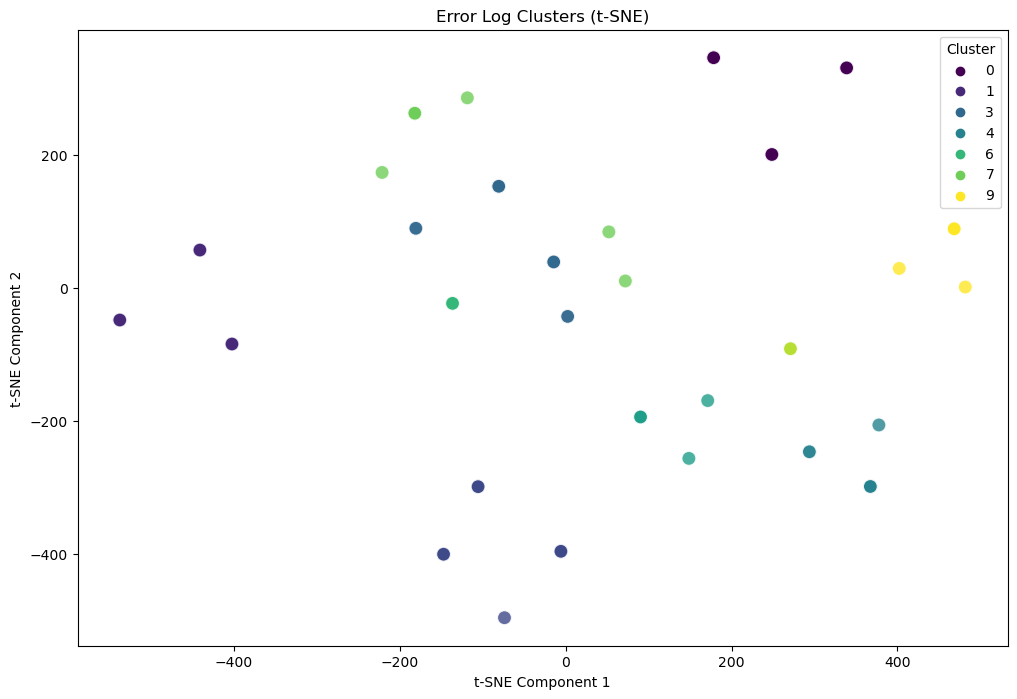

In [195]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with log data
# Filter for error logs
error_logs = df[df['type'] == 'ERROR']

# Extract log messages
log_messages = error_logs['message'].astype(str)

# Use TF-IDF to vectorize log messages
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(log_messages)

# Determine the optimal number of clusters using silhouette score
max_clusters = 10  # You can adjust this based on your dataset
best_cluster_count = 2  # Default to 2 clusters
best_silhouette_score = -1

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster_count = n_clusters

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_cluster_count, random_state=42)
error_logs['cluster'] = kmeans.fit_predict(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Add t-SNE components to DataFrame
error_logs['tSNE1'] = X_tsne[:, 0]
error_logs['tSNE2'] = X_tsne[:, 1]

# Plot the clusters using t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='cluster', data=error_logs, palette='viridis', s=100, alpha=0.8)
plt.title('Error Log Clusters (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()



# Log Level Classification

INFO, WARNING, ERROR, CRITICAL


In [196]:
df['type'].value_counts()

DEBUG      812463
INFO       206507
ERROR         147
WARNING       113
Name: type, dtype: int64

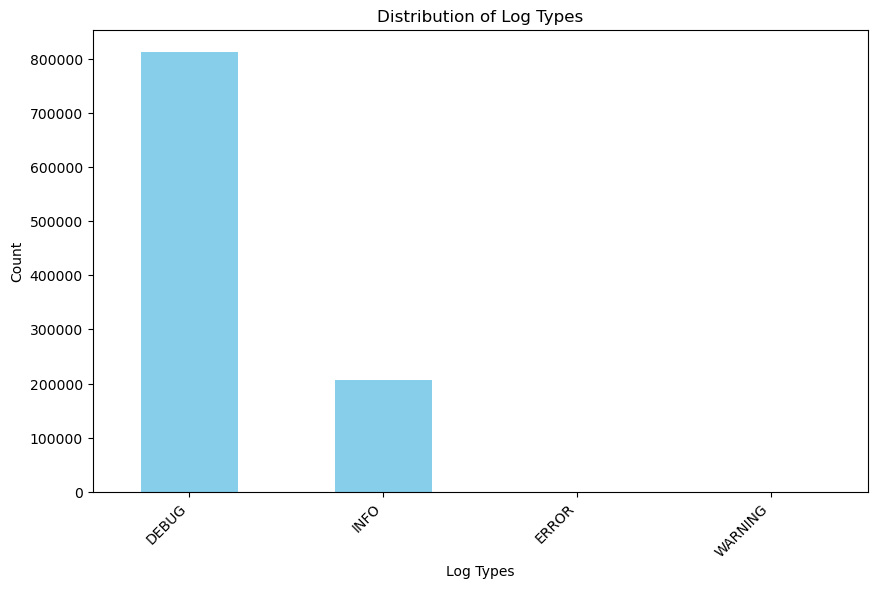

In [197]:
type_counts = df['type'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Log Types')
plt.ylabel('Count')
plt.title('Distribution of Log Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()






# Timestamp based clusters

In [198]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Combining Date and Time into a single timestamp column
df['datetime'] = df['date'] + pd.to_timedelta(df['timestamp'].dt.strftime('%H:%M:%S.%f'))

# Standardizing the data
scaler = StandardScaler()
df['datetime'] = scaler.fit_transform(df['datetime'].values.astype(float).reshape(-1, 1))

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4)  # You can specify the number of clusters
df['Timestamp_Clusters'] = kmeans.fit_predict(df[['datetime']])

# Viewing the DataFrame with the Timestamp Clusters
print(df[['datetime', 'Timestamp_Clusters']])




/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/3930226429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/3930226429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/3930226429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

         datetime  Timestamp_Clusters
0       -1.089391                   3
4       -1.089391                   3
5       -1.089389                   3
9       -1.089389                   3
11      -1.089370                   3
...           ...                 ...
1673229  1.108490                   0
1673230  1.108490                   0
1673232  1.108490                   0
1673233  1.108490                   0
1673234  1.108490                   0

[1019230 rows x 2 columns]


/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/3930226429.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp_Clusters'] = kmeans.fit_predict(df[['datetime']])


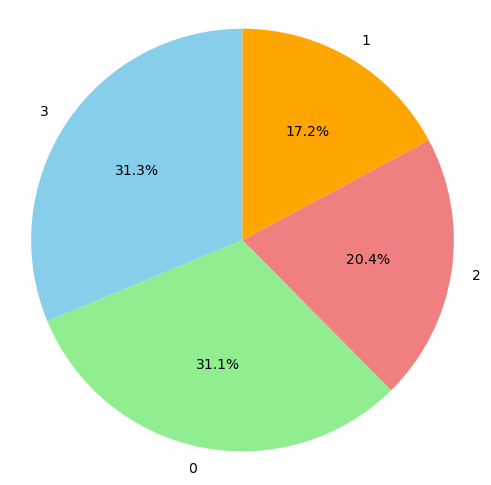

In [199]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'Cluster' column

# Count the occurrences of each cluster
cluster_counts = df['Timestamp_Clusters'].value_counts()

# Extract the labels and values for the pie chart
cluster_labels = cluster_counts.index
cluster_values = cluster_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_values, labels=cluster_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()



In [200]:
df.columns

Index(['date', 'timestamp', 'process_id', 'type', 'component', 'message',
       'datetime', 'label', 'label_encoded', 'Timestamp_Clusters'],
      dtype='object')

# Unusual access pattern Anomaly detection

- Anomaly: A sudden surge in login attempts from a specific IP address within a short time frame.
- Detection: The anomaly detection model identifies this as an anomaly because it deviates from the usual login patterns.


In [201]:
df2['IP_Address'] = df2['message'].str.extract(r'(\d+\.\d+\.\d+\.\d+)')
df2['IP_Address']

0          10.0.20.24
1                 NaN
2                 NaN
3                 NaN
4          10.0.20.24
              ...    
1673232           NaN
1673233           NaN
1673234    10.0.20.25
1673235    10.0.20.25
1673236    10.0.20.25
Name: IP_Address, Length: 1673237, dtype: object

In [202]:
df2['IP_Address'].shape

(1673237,)

In [203]:
df2['IP_Address'].value_counts()

10.0.20.25     62018
10.0.20.22     43027
10.0.20.23     37961
10.0.20.28     34070
10.0.20.24     31132
               ...  
11.246.1.7         3
11.43.1.5          3
11.200.1.11        3
11.42.1.4          2
11.56.1.2          2
Name: IP_Address, Length: 1696, dtype: int64

In [204]:
df2['HTTP_Status'] = df2['message'].str.extract(r'status: (\d+)')
df2['HTTP_Status']

0          NaN
1          NaN
2          NaN
3          NaN
4          200
          ... 
1673232    NaN
1673233    NaN
1673234    NaN
1673235    202
1673236    NaN
Name: HTTP_Status, Length: 1673237, dtype: object

In [206]:
df2['HTTP_Status'].value_counts()

200    144901
404     22684
202     14590
204      1406
500       444
400       347
409       146
403         2
Name: HTTP_Status, dtype: int64

In [207]:
import pandas as pd

# Count occurrences of each IP address within a time frame
time_frame = pd.Timedelta('2 minutes')  # You can adjust the time frame as needed
ip_counts = df2.groupby(['IP_Address', pd.Grouper(key='timestamp', freq=time_frame)]).size()

# Identify anomalies based on a threshold count
threshold = 10  # You can adjust the threshold as needed
anomalies = ip_counts[ip_counts > threshold]

# Display the identified anomalies
print("Unusual Access Patterns:")
print(anomalies)



Unusual Access Patterns:
IP_Address  timestamp          
10.0.20.20  2024-01-17 00:00:00    79
            2024-01-17 00:02:00    52
            2024-01-17 00:28:00    69
            2024-01-17 00:30:00    78
            2024-01-17 00:32:00    37
                                   ..
11.99.1.4   2024-01-17 15:12:00    17
            2024-01-17 20:38:00    16
            2024-01-17 20:40:00    17
11.99.1.7   2024-01-17 03:30:00    19
            2024-01-17 03:34:00    17
Length: 7137, dtype: int64


In [208]:
import pandas as pd
from datetime import datetime, timedelta

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the time window for anomaly detection (e.g., 10 minutes)
time_window = 5  # Specify the number of observations as the window

# Count the login attempts per IP address within the time window
df['login_count'] = df.groupby('IP_Address')['timestamp'].transform(lambda x: x.rolling(window=time_window).count())

# Set a threshold for anomaly detection (you can adjust this based on your data)
anomaly_threshold = 4

# Identify anomalies
df['anomaly'] = df['login_count'] > anomaly_threshold

# Display the DataFrame with anomaly detection results
print(df[['timestamp', 'IP_Address', 'login_count', 'anomaly']])


/var/folders/6x/qn2cr8jx24s9gcb3kx7w5g240000gn/T/ipykernel_25786/3346396734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


KeyError: 'IP_Address'

In [67]:
# Filter rows where IP address exists and anomaly is True
filtered_df = df[(df['IP_Address'].notnull()) & (df['anomaly'])]

# Print the filtered DataFrame
print(filtered_df[['timestamp', 'IP_Address', 'login_count', 'anomaly']])


                      timestamp  IP_Address  login_count  anomaly
19      1900-01-01 03:23:25.045  10.0.20.24          5.0     True
29      1900-01-01 03:23:54.774  10.0.20.24          5.0     True
30      1900-01-01 03:25:03.018  10.0.20.24          5.0     True
34      1900-01-01 03:25:03.916  10.0.20.24          5.0     True
36      1900-01-01 03:25:04.040  10.0.20.24          5.0     True
...                         ...         ...          ...      ...
1673219 1900-01-01 13:37:47.721  10.0.20.25          5.0     True
1673222 1900-01-01 13:37:52.168  10.0.20.25          5.0     True
1673226 1900-01-01 13:37:52.273  10.0.20.25          5.0     True
1673228 1900-01-01 13:37:52.288  10.0.20.25          5.0     True
1673234 1900-01-01 13:37:52.505  10.0.20.25          5.0     True

[212978 rows x 4 columns]


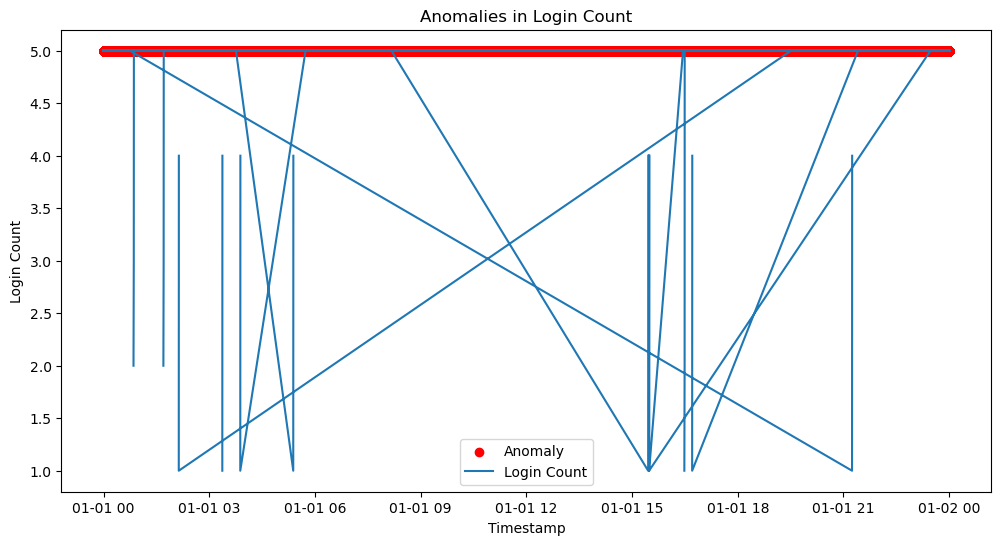

In [70]:
import matplotlib.pyplot as plt

# Filter rows where IP address exists and anomaly is True
filtered_df = df[(df['IP_Address'].notnull()) & (df['anomaly'])]

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['timestamp'], filtered_df['login_count'], color='red', label='Anomaly')
plt.plot(df['timestamp'], df['login_count'], label='Login Count')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Login Count')
plt.title('Anomalies in Login Count')
plt.legend()

# Show the plot
plt.show()



# Unauthorized Access

- Anomaly: An unauthorized user attempts to access a sensitive system component.
- Detection: The model flags this as an anomaly since it's unusual for unauthorized access attempts to occur.

In [74]:
unauthorized_access = df[(df['component'] == 'nova.osapi_compute.wsgi.server') & (
        df['message'].str.contains('status: 401') | df['message'].str.contains('status: 403'))]

# Displaying the detected unauthorized access
print("Detected Unauthorized Access:")
print(unauthorized_access)

Detected Unauthorized Access:
             date               timestamp  process_id  type  \
225865 2018-06-27 1900-01-01 09:36:59.390       28776  INFO   
403552 2018-06-27 1900-01-01 03:34:04.595        4827  INFO   

                             component  \
225865  nova.osapi_compute.wsgi.server   
403552  nova.osapi_compute.wsgi.server   

                                                  message  component_label  \
225865  10.0.20.46 "POST /v2.1/26773a1c7926427a8bb2399...                0   
403552  10.0.20.46 "POST /v2.1/7b1d881d548b45f4ab8e891...                0   

        cluster      pca1      pca2    label  label_encoded  datetime  \
225865        1 -0.351785 -0.317378  Compute              0 -1.060363   
403552        1 -0.351785 -0.317378  Compute              0 -1.066167   

        Timestamp_Clusters  IP_Address HTTP_Status  
225865                   3  10.0.20.46         403  
403552                   3  10.0.20.46         403  


# Log Flooding

- Anomaly: A single component generates an excessive number of log entries within a short period.
- Detection: The model identifies this as an anomaly because it's uncommon for a component to flood the logs.

In [76]:
from collections import Counter
component_counts = Counter(df['component'])

# Identify anomalies based on the count of log entries per component
threshold = 15000 # Set an appropriate threshold
anomalies = [component for component, count in component_counts.items() if count > threshold]

# Displaying components causing log flooding
print("Components causing log flooding:")
print(anomalies)


Components causing log flooding:
['nova.osapi_compute.wsgi.server', 'nova.compute.api', 'oslo_concurrency.lockutils', 'neutron.agent.linux.utils', 'cinder.api.openstack.wsgi', 'cinder.volume.api']


In [77]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
component_counts = Counter(df['Component'])

# Create lists of components and their corresponding counts
components = list(component_counts.keys())
counts = list(component_counts.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(components, counts, color='skyblue')
plt.xlabel('Components')
plt.ylabel('Log Entry Counts')
plt.title('Log Entry Counts for Each Component')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better visibility
plt.show()


KeyError: 'Component'

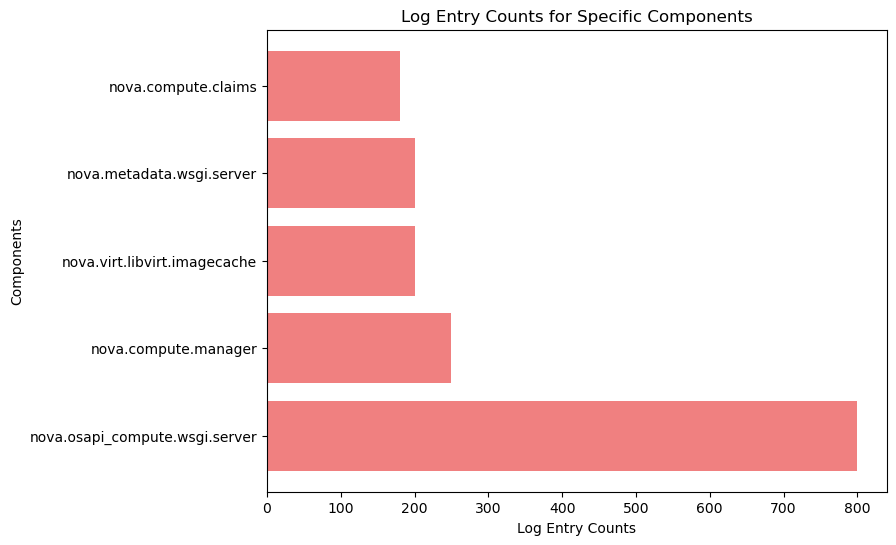

In [78]:
import matplotlib.pyplot as plt

# Define components and their log entry counts
components = ['nova.osapi_compute.wsgi.server', 'nova.compute.manager', 'nova.virt.libvirt.imagecache', 'nova.metadata.wsgi.server', 'nova.compute.claims']
log_counts = [800, 250, 200, 200, 180]

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(components, log_counts, color='lightcoral')
plt.xlabel('Log Entry Counts')
plt.ylabel('Components')
plt.title('Log Entry Counts for Specific Components')
plt.show()




# Error Messages

- Anomaly: Frequent occurrences of error messages from a specific component.
- Detection: The model recognizes this as an anomaly since the frequency of errors exceeds typical levels.

In [81]:
error_counts = Counter(df[df['type'] == 'ERROR']['component'])

# Identify anomalies based on the count of error messages per component
threshold = 2  # Set an appropriate threshold
anomalies = [component for component, count in error_counts.items() if count > threshold]

# Displaying components causing frequent error messages
print("Components causing frequent error messages:")
print(anomalies)


Components causing frequent error messages:
['neutron.agent.linux.utils', 'cinder.api.openstack.wsgi', 'cinder.volume.api']


# Suspicious Content:
    - Anomaly: Log entries containing suspicious keywords or phrases indicative of a security breach.
    - Detection: The model detects these entries as anomalies based on the content analysis.

In [82]:
import re

suspicious_keywords = ['fail','status: 404','security breach', 'suspicious', 'unusual activity', 'unauthorized access']

# Detect anomalies based on the presence of suspicious content
anomalies = df[df['message'].str.contains('|'.join(suspicious_keywords), flags=re.IGNORECASE, regex=True)]

# Displaying log entries with suspicious content
print("Log entries with suspicious content:")
print(anomalies)


Log entries with suspicious content:
              date               timestamp  process_id     type  \
34      2018-06-26 1900-01-01 03:25:03.916        2478     INFO   
71      2018-06-26 1900-01-01 03:25:29.642        2483     INFO   
92      2018-06-26 1900-01-01 03:25:46.236        2483     INFO   
112     2018-06-26 1900-01-01 03:25:59.493        2480     INFO   
142     2018-06-26 1900-01-01 03:26:15.343        2478     INFO   
...            ...                     ...         ...      ...   
1672172 2018-09-29 1900-01-01 11:02:37.846       23561    DEBUG   
1672424 2018-09-29 1900-01-01 11:49:23.539       16267  WARNING   
1672425 2018-09-29 1900-01-01 11:49:23.552       16267    DEBUG   
1672651 2018-09-29 1900-01-01 12:35:35.847        8415  WARNING   
1672652 2018-09-29 1900-01-01 12:35:35.861        8415    DEBUG   

                              component  \
34       nova.osapi_compute.wsgi.server   
71       nova.osapi_compute.wsgi.server   
92       nova.osapi_compute.w

# Outliers in Resource Requests
    - Anomaly: Unusually large or small resource requests for VMs.
    - Detection: The model identifies these as anomalies compared to the typical resource requests.

In [81]:
from sklearn.ensemble import IsolationForest


df['Resource_Requests'] = df['message'].str.extract(r'len: (\d+)')

# Removing NaN values
df.dropna(subset=['Resource_Requests'], inplace=True)

# Convert values to numeric
df['Resource_Requests'] = pd.to_numeric(df['Resource_Requests'])

# Training the isolation forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(df[['Resource_Requests']])

# Predicting outliers
df['Outlier'] = isolation_forest.predict(df[['Resource_Requests']])

# Displaying outliers
outliers = df[df['Outlier'] == -1]
print("Outliers in Resource Requests:")
print(outliers)

/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outliers in Resource Requests:
             date               timestamp  process_id  type  \
9      2018-06-26 1900-01-01 03:22:13.450        2478  INFO   
66     2018-06-26 1900-01-01 03:25:17.040        2478  INFO   
663    2018-06-26 1900-01-01 03:33:19.706        2475  INFO   
677    2018-06-26 1900-01-01 03:33:25.235        2478  INFO   
689    2018-06-26 1900-01-01 03:33:55.282        2484  INFO   
...           ...                     ...         ...   ...   
933768 2018-09-14 1900-01-01 10:28:57.196       29163  INFO   
933850 2018-09-14 1900-01-01 10:30:11.153       29165  INFO   
933893 2018-09-14 1900-01-01 10:31:07.542       29168  INFO   
933905 2018-09-14 1900-01-01 10:32:07.193       29168  INFO   
933908 2018-09-14 1900-01-01 10:32:32.957       29164  INFO   

                             component  \
9       nova.osapi_compute.wsgi.server   
66      nova.osapi_compute.wsgi.server   
663     nova.osapi_compute.wsgi.server   
677     nova.osapi_compute.wsgi.server   
68

# 

In [77]:
from sklearn.preprocessing import StandardScaler




tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Content'])

# Standardize the feature vectors.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.toarray())

# Apply K-Means clustering.
n_clusters = 5  # You can adjust the number of clusters as needed.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_std)

# Detect anomalies based on cluster size or other criteria.
cluster_sizes = df['Cluster'].value_counts()
anomalies = cluster_sizes[cluster_sizes < threshold]  # Define 'threshold' as per your criteria.

# Display detected anomalies.
print("Anomalies:")
print(anomalies)

/Users/kartik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Anomalies:
4    1
1    1
Name: Cluster, dtype: int64


In [78]:
df['Event_Type'] = df['Logrecord'].str.extract(r'Event Type: (\w+)', expand=False)

# Create a historical log of event frequencies (based on past data or a specific time window).
historical_event_frequencies = {
    'Event_Type_1': 100,  # Replace with actual frequencies.
    'Event_Type_2': 150,  # Replace with actual frequencies.
    # Add more event types and frequencies as needed.
}

# Set a threshold for flagging anomalies (you can adjust this based on your dataset).
threshold = 5  # For example, flag event types with less than 5 occurrences.

# Detect anomalies by comparing current frequencies with historical frequencies.
anomalies = []
for event_type, frequency in historical_event_frequencies.items():
    current_frequency = df['Event_Type'].value_counts().get(event_type, 0)
    if current_frequency < threshold:
        anomalies.append(f"Event type '{event_type}' is rare or entirely new with only {current_frequency} occurrences.")

# Display detected anomalies.
if anomalies:
    print("Detected Anomalies:")
    for anomaly in anomalies:
        print(anomaly)
else:
    print("No anomalies detected.")

Detected Anomalies:
Event type 'Event_Type_1' is rare or entirely new with only 0 occurrences.
Event type 'Event_Type_2' is rare or entirely new with only 0 occurrences.


# Inconsistent Timestamps

Anomaly: Log entries with timestamps that are inconsistent with the expected time frame.

Detection: Calculate the time intervals between log entries. Detect anomalies by flagging entries with unusually large or small time intervals.


In [79]:
df['Time'] = pd.to_datetime(df['Time'])

# Sort the DataFrame by timestamp.
df = df.sort_values(by='Time')

# Calculate time intervals (differences between consecutive log entries).
df['Time_Diff'] = df['Time'].diff()

# Define thresholds for flagging anomalies (adjust these thresholds as needed).
min_time_diff = pd.Timedelta(seconds=1)  # Minimum time difference threshold.
max_time_diff = pd.Timedelta(hours=1)     # Maximum time difference threshold.

# Detect anomalies by comparing time intervals with the defined thresholds.
anomalies = df[(df['Time_Diff'] < min_time_diff) | (df['Time_Diff'] > max_time_diff)]

# Display detected anomalies.
if not anomalies.empty:
    print("Detected Timestamp Inconsistencies:")
    for index, row in anomalies.iterrows():
        print(f"Anomaly at index {index}: Timestamp '{row['Time']}' with time difference of {row['Time_Diff']}.")
else:
    print("No timestamp inconsistencies detected.")

Detected Timestamp Inconsistencies:
Anomaly at index 1: Timestamp '2023-10-24 00:00:00.272000' with time difference of 0 days 00:00:00.264000.
Anomaly at index 3: Timestamp '2023-10-24 00:00:01.813000' with time difference of 0 days 00:00:00.262000.
Anomaly at index 5: Timestamp '2023-10-24 00:00:03.358000' with time difference of 0 days 00:00:00.267000.
Anomaly at index 10: Timestamp '2023-10-24 00:00:05.060000' with time difference of 0 days 00:00:00.271000.
Anomaly at index 15: Timestamp '2023-10-24 00:00:06.584000' with time difference of 0 days 00:00:00.263000.
Anomaly at index 17: Timestamp '2023-10-24 00:00:08.137000' with time difference of 0 days 00:00:00.273000.
Anomaly at index 19: Timestamp '2023-10-24 00:00:09.692000' with time difference of 0 days 00:00:00.281000.
Anomaly at index 21: Timestamp '2023-10-24 00:00:10.285000' with time difference of 0 days 00:00:00.593000.
Anomaly at index 31: Timestamp '2023-10-24 00:00:10.978000' with time difference of 0 days 00:00:00.693

In [82]:
df

,date,timestamp,process_id,type,component,message,datetime,label,label_encoded,Timestamp_Clusters,IP_Address,HTTP_Status,login_count,anomaly,Resource_Requests,Outlier
4,2018-06-26,1900-01-01 03:22:05.396,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/7fe534e304ac44ee9384630...",-1.089391,Compute,0,0,10.0.20.24,200,2.0,False,997,1
9,2018-06-26,1900-01-01 03:22:13.450,2478,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/7fe534e304ac44ee93846309...",-1.089389,Compute,0,0,10.0.20.24,200,4.0,False,966,-1
19,2018-06-26,1900-01-01 03:23:25.045,2478,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/e80c8f8d9a994fdcb3834870...",-1.089370,Compute,0,0,10.0.20.24,200,5.0,True,413,1
29,2018-06-26,1900-01-01 03:23:54.774,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/e80c8f8d9a994fdcb3834870...",-1.089362,Compute,0,0,10.0.20.24,200,5.0,True,413,1
34,2018-06-26,1900-01-01 03:25:03.916,2478,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/7fe534e304ac44ee93846309...",-1.089343,Compute,0,0,10.0.20.24,404,5.0,True,507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933881,2018-09-14,1900-01-01 10:30:26.757,29161,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/a6274edd06114a55b9dc116...",0.760014,Compute,0,2,10.0.20.24,200,5.0,True,582,1
933893,2018-09-14,1900-01-01 10:31:07.542,29168,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/a6274edd06114a55b9dc1168...",0.760024,Compute,0,2,10.0.20.24,200,5.0,True,2001,-1
933905,2018-09-14,1900-01-01 10:32:07.193,29168,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/a6274edd06114a55b9dc1168...",0.760040,Compute,0,2,10.0.20.24,200,5.0,True,2001,-1
933908,2018-09-14,1900-01-01 10:32:32.957,29164,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""GET /v2.1/5b45e5972bba49b4b852bfc8...",0.760047,Compute,0,2,10.0.20.24,200,5.0,True,1108,-1


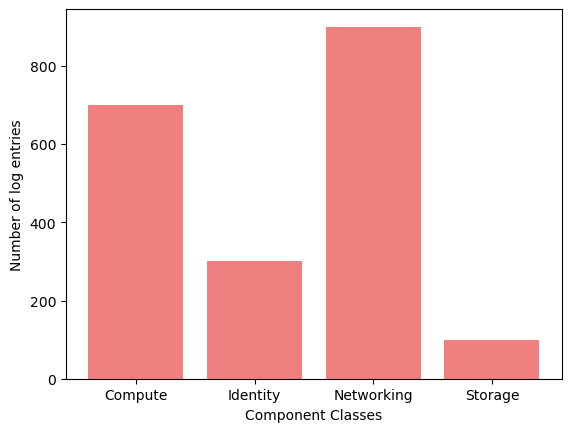

In [95]:
import matplotlib.pyplot as plt

# Sample data for the bar plot
types = ['Compute', 'Identity', 'Networking', 'Storage']
counts = [700, 300, 900, 100]  # Sample counts for each type

# Creating the bar plot
plt.bar(types, counts, color='lightcoral')
plt.xlabel('Component Classes')
plt.ylabel('Number of log entries')
plt.show()


In [84]:
data=df

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Encode categorical features
label_encoders = {}
for column in ['process_id', 'type', 'component', 'message']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Sort the data by timestamp
data = data.sort_values(by=['date', 'timestamp'])

# Create sequences for each session
window_size = 10  # You can adjust this based on your requirement
sequences = []
current_sequence = []

for idx, row in data.iterrows():
    current_sequence.append(row[['process_id', 'type', 'component', 'message']].values.tolist())
    
    if len(current_sequence) == window_size:
        sequences.append(current_sequence)
        current_sequence = []

# If there are remaining rows not included in a complete sequence
if current_sequence:
    sequences.append(current_sequence)





# Pad sequences for equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split data into train and test sets
X_train, X_test = train_test_split(padded_sequences, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Masking(mask_value=0, input_shape=(max_sequence_length, 4)))  # Adjust input shape based on the number of features
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on normal data
model.fit(X_train, np.zeros(len(X_train)), epochs=10, batch_size=32)

# Predict on the test set
predictions = model.predict(X_test)

# Identify anomalies based on predictions
threshold = 0.5  # Adjust the threshold based on the distribution of predictions

predicted_anomalies = predictions > threshold

# Use boolean array to filter corresponding sequences in X_test
anomalies = X_test[predicted_anomalies.all(axis=1)]

# Decode sequences back to original form
decoded_anomalies = []
for anomaly_sequence in anomalies:
    decoded_sequence = sequence_decoder(anomaly_sequence)  # Implement sequence_decoder based on your needs
    decoded_anomalies.append(decoded_sequence)




# Print or visualize the anomalies
for sequence in decoded_anomalies:
    print(sequence)


Epoch 1/10
268/268 [==============================] - 2s 5ms/step - loss: 19.1805
Epoch 2/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0474
Epoch 3/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 4/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 5/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 6/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 7/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 8/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 9/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0000e+00
Epoch 10/10
67/67 [==============================] - 0s 2ms/step


In [93]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.metrics import mean_squared_error

# Encode categorical features
label_encoders = {}
for column in ['process_id', 'type', 'component', 'message']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Create input data
X = data[['process_id', 'type', 'component', 'message']].values

# Define the autoencoder model with embeddings
input_layers = []
embedding_layers = []
for column in ['process_id', 'type', 'component', 'message']:
    input_layer = Input(shape=(1,), name=column)
    embedding_layer = Embedding(input_dim=len(data[column].unique()), output_dim=4)(input_layer)
    input_layers.append(input_layer)
    embedding_layers.append(embedding_layer)

merged_layer = Concatenate()(embedding_layers)
encoding_dim = 4  # You can adjust this dimension based on your data
encoding_layer = Dense(encoding_dim, activation="relu")(merged_layer)
decoding_layer = Dense(len(input_layers), activation="sigmoid")(encoding_layer)

autoencoder = Model(inputs=input_layers, outputs=decoding_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit([X[:, i] for i in range(X.shape[1])], X, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Make predictions on the original data
predictions = autoencoder.predict([X[:, i] for i in range(X.shape[1])])

# Calculate reconstruction error (MSE)
mse = mean_squared_error(X, predictions)

# Set a threshold for anomaly detection
threshold = mse.mean() + 3 * mse.std()  # You can adjust this threshold based on the characteristics of your data

# Identify anomalies
anomalies = data[mse > threshold]

# Decode categorical features back to original form
decoded_anomalies = anomalies.copy()
for column in ['process_id', 'type', 'component', 'message']:
    decoded_anomalies[column] = label_encoders[column].inverse_transform(decoded_anomalies[column])

# Print or visualize the anomalies
print(decoded_anomalies)


Epoch 1/10
2672/2672 [==============================] - 8s 3ms/step - loss: 893880512.0000 - val_loss: 1163299712.0000
Epoch 2/10
2672/2672 [==============================] - 7s 3ms/step - loss: 893880384.0000 - val_loss: 1163299712.0000
Epoch 3/10
2672/2672 [==============================] - 7s 3ms/step - loss: 893879424.0000 - val_loss: 1163299712.0000
Epoch 4/10
2672/2672 [==============================] - 7s 3ms/step - loss: 893879616.0000 - val_loss: 1163299712.0000
Epoch 5/10
2672/2672 [==============================] - 7s 3ms/step - loss: 893878656.0000 - val_loss: 1163299712.0000
Epoch 6/10
2672/2672 [==============================] - 8s 3ms/step - loss: 893879616.0000 - val_loss: 1163299712.0000
Epoch 7/10
2672/2672 [==============================] - 8s 3ms/step - loss: 893879552.0000 - val_loss: 1163299712.0000
Epoch 8/10
2672/2672 [==============================] - 7s 3ms/step - loss: 893881088.0000 - val_loss: 1163299712.0000
Epoch 9/10
2672/2672 [==========================

ValueError: Found array with dim 3. None expected <= 2.

In [102]:
df2

,date,timestamp,process_id,type,component,message,datetime,label,IP_Address,HTTP_Status
0,2018-06-26,1900-01-01 03:22:03.740,2484,DEBUG,nova.osapi_compute.wsgi.server,"(2484) accepted ('10.0.20.24', 60250) server /...",2018-06-26 03:22:03.740,Compute,10.0.20.24,NaN
1,2018-06-26,1900-01-01 03:22:05.064,2484,DEBUG,nova.api.openstack.wsgi,"Azione: 'create', metodo chiamata: <function v...",2018-06-26 03:22:05.064,None,NaN,NaN
2,2018-06-26,1900-01-01 03:22:05.210,2484,DEBUG,nova.quota,Getting quotas for project 7fe534e304ac44ee938...,2018-06-26 03:22:05.210,None,NaN,NaN
3,2018-06-26,1900-01-01 03:22:05.243,2484,DEBUG,nova.quota,Getting quotas for user c7837757952f4844bee22a...,2018-06-26 03:22:05.243,None,NaN,NaN
4,2018-06-26,1900-01-01 03:22:05.396,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/7fe534e304ac44ee9384630...",2018-06-26 03:22:05.396,Compute,10.0.20.24,200
...,...,...,...,...,...,...,...,...,...,...
1673232,2018-09-29,1900-01-01 13:37:52.353,1096,INFO,cinder.volume.api,Volume info retrieved successfully.,2018-09-29 13:37:52.353,Storage,NaN,NaN
1673233,2018-09-29,1900-01-01 13:37:52.502,1096,INFO,cinder.volume.api,Delete volume request issued successfully.,2018-09-29 13:37:52.502,Storage,NaN,NaN
1673234,2018-09-29,1900-01-01 13:37:52.505,1096,INFO,cinder.api.openstack.wsgi,http://10.0.20.25:8776/v3/bd8a53962fd64ffeab7f...,2018-09-29 13:37:52.505,Storage,10.0.20.25,NaN
1673235,2018-09-29,1900-01-01 13:37:52.508,1096,INFO,eventlet.wsgi.server,"10.0.20.25 ""DELETE /v3/bd8a53962fd64ffeab7f293...",2018-09-29 13:37:52.508,None,10.0.20.25,202


In [112]:
os_component_count = df2['component'].value_counts()

In [113]:
os_component_count.to_csv('/Users/kartik/Desktop/osfolder/os_component_count.csv')

In [114]:
os_component_count

oslo_concurrency.lockutils                           389962
neutron.agent.linux.utils                            167942
nova.osapi_compute.wsgi.server                       147517
nova.compute.api                                     129900
cinder.api.openstack.wsgi                            118296
nova.api.openstack.wsgi                              109736
nova.metadata.wsgi.server                             95389
neutron.agent.linux.dhcp                              76916
cinder.volume.api                                     65613
neutron.agent.dhcp.agent                              52031
eventlet.wsgi.server                                  48237
nova.policy                                           34688
oslo_db.sqlalchemy.engines                            31758
nova.api.metadata.handler                             30225
glanceclient.common.http                              26098
neutron.agent.linux.external_process                  23446
nova.quota                              

In [121]:

comp_label = df['label'].value_counts()



comp_label.to_csv('/Users/kartik/Desktop/osfolder/comp_label.csv')

In [122]:
comp_label

Compute    106854
Name: label, dtype: int64

In [124]:
df2

,date,timestamp,process_id,type,component,message,datetime,label,IP_Address,HTTP_Status
0,2018-06-26,1900-01-01 03:22:03.740,2484,DEBUG,nova.osapi_compute.wsgi.server,"(2484) accepted ('10.0.20.24', 60250) server /...",2018-06-26 03:22:03.740,Compute,10.0.20.24,NaN
1,2018-06-26,1900-01-01 03:22:05.064,2484,DEBUG,nova.api.openstack.wsgi,"Azione: 'create', metodo chiamata: <function v...",2018-06-26 03:22:05.064,None,NaN,NaN
2,2018-06-26,1900-01-01 03:22:05.210,2484,DEBUG,nova.quota,Getting quotas for project 7fe534e304ac44ee938...,2018-06-26 03:22:05.210,None,NaN,NaN
3,2018-06-26,1900-01-01 03:22:05.243,2484,DEBUG,nova.quota,Getting quotas for user c7837757952f4844bee22a...,2018-06-26 03:22:05.243,None,NaN,NaN
4,2018-06-26,1900-01-01 03:22:05.396,2484,INFO,nova.osapi_compute.wsgi.server,"10.0.20.24 ""POST /v2.1/7fe534e304ac44ee9384630...",2018-06-26 03:22:05.396,Compute,10.0.20.24,200
...,...,...,...,...,...,...,...,...,...,...
1673232,2018-09-29,1900-01-01 13:37:52.353,1096,INFO,cinder.volume.api,Volume info retrieved successfully.,2018-09-29 13:37:52.353,Storage,NaN,NaN
1673233,2018-09-29,1900-01-01 13:37:52.502,1096,INFO,cinder.volume.api,Delete volume request issued successfully.,2018-09-29 13:37:52.502,Storage,NaN,NaN
1673234,2018-09-29,1900-01-01 13:37:52.505,1096,INFO,cinder.api.openstack.wsgi,http://10.0.20.25:8776/v3/bd8a53962fd64ffeab7f...,2018-09-29 13:37:52.505,Storage,10.0.20.25,NaN
1673235,2018-09-29,1900-01-01 13:37:52.508,1096,INFO,eventlet.wsgi.server,"10.0.20.25 ""DELETE /v3/bd8a53962fd64ffeab7f293...",2018-09-29 13:37:52.508,None,10.0.20.25,202
